In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ventilator-pressure-prediction/sample_submission.csv
/kaggle/input/ventilator-pressure-prediction/train.csv
/kaggle/input/ventilator-pressure-prediction/test.csv


In [2]:
import pandas as pd
import tensorflow as tf
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
Train_df = pd.read_csv("/kaggle/input/ventilator-pressure-prediction/train.csv")
Test_df = pd.read_csv("/kaggle/input/ventilator-pressure-prediction/test.csv")
sample_df = pd.read_csv("/kaggle/input/ventilator-pressure-prediction/sample_submission.csv")

In [4]:
Train_df.head()
Train_df

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987
...,...,...,...,...,...,...,...,...
6035995,6035996,125749,50,10,2.504603,1.489714,1,3.869032
6035996,6035997,125749,50,10,2.537961,1.488497,1,3.869032
6035997,6035998,125749,50,10,2.571408,1.558978,1,3.798729
6035998,6035999,125749,50,10,2.604744,1.272663,1,4.079938


In [5]:
Train_df.nunique().to_frame()
Train_df.isnull().sum(axis = 0).to_frame()

,0
id,0
breath_id,0
R,0
C,0
time_step,0
u_in,0
u_out,0
pressure,0


In [6]:
breath_one = Train_df[Train_df["breath_id"] == 1].reset_index(drop = True)
breath_one.nunique().to_frame()

,0
id,80
breath_id,1
R,1
C,1
time_step,80
u_in,66
u_out,2
pressure,55


<Axes: title={'center': 'pressure'}, xlabel='time_step'>

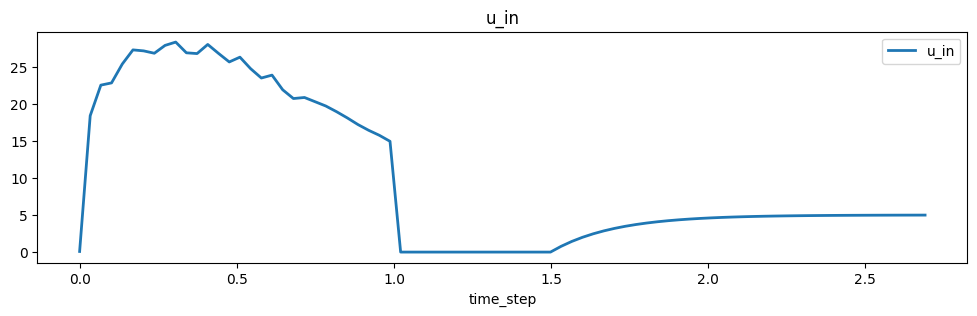

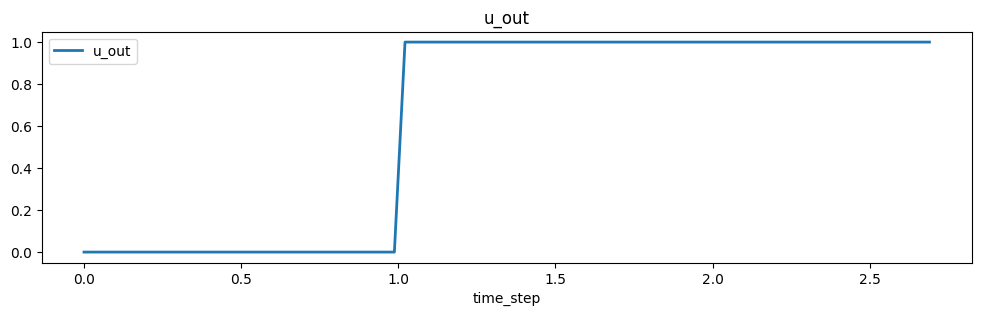

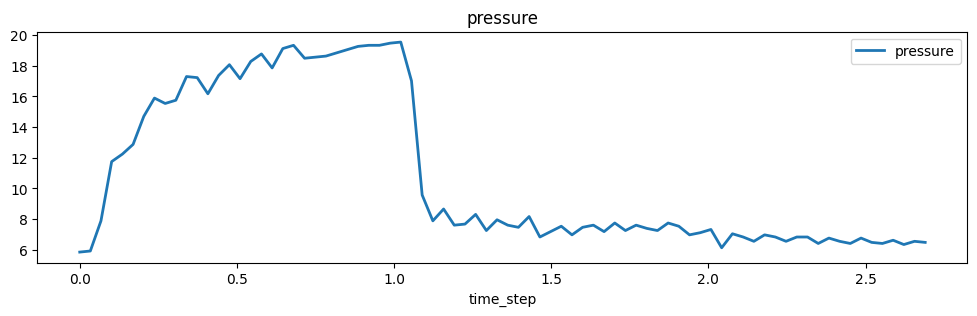

In [7]:
breath_one.plot(x = "time_step" , y = "u_in", kind = "line", figsize = (12, 3), lw = 2, title = "u_in")
breath_one.plot(x = "time_step", y = "u_out", kind = "line", figsize = (12, 3), lw = 2, title = "u_out")
breath_one.plot(x = "time_step", y = "pressure", kind = "line", figsize = (12, 3), lw = 2, title = "pressure")

Text(0.5, 1.0, 'R = 50, C = 50')

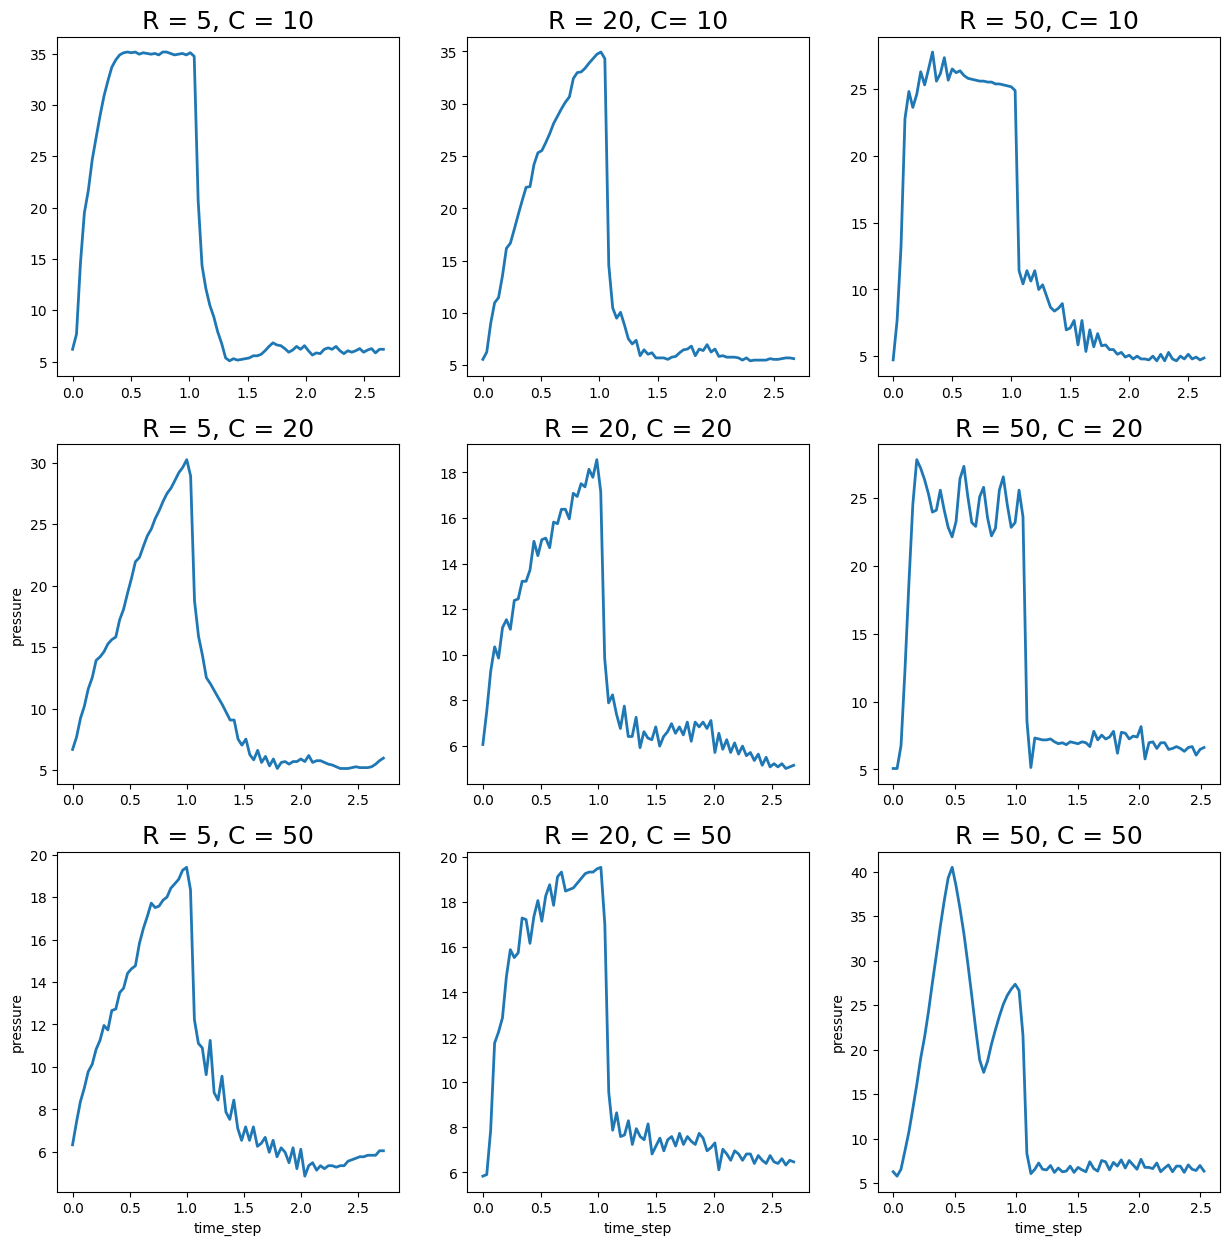

In [8]:
breath_2 = Train_df.query('breath_id == 2').reset_index(drop = True)
breath_3 = Train_df.query('breath_id == 3').reset_index(drop = True)
breath_4 = Train_df.query('breath_id == 4').reset_index(drop = True)
breath_5 = Train_df.query('breath_id == 5').reset_index(drop = True)
breath_17 = Train_df.query('breath_id == 17').reset_index(drop = True)
breath_18 = Train_df.query('breath_id == 18').reset_index(drop = True)
breath_21 = Train_df.query('breath_id == 21').reset_index(drop = True)
breath_39 = Train_df.query('breath_id == 39').reset_index(drop = True)

fig, axes = plt.subplots(3, 3, figsize = (15, 15))
sns.lineplot(data = breath_39, x = "time_step", y = "pressure", lw = 2, ax = axes[0,0])
axes[0,0].set_title("R = 5, C = 10", fontsize = 18)
axes[0,0].set(xlabel = '')
axes[0,0].set(ylabel = '')

sns.lineplot(data = breath_21, x = "time_step", y = "pressure", lw = 2, ax = axes[0,1])
axes[0,1].set_title("R = 20, C= 10", fontsize = 18)
axes[0,1].set(xlabel = '')
axes[0,1].set(ylabel = '')

sns.lineplot(data = breath_18, x = "time_step", y = "pressure", lw = 2, ax = axes[0,2])
axes[0,2].set_title("R = 50, C= 10", fontsize = 18)
axes[0,2].set(xlabel = '')
axes[0,2].set(ylabel = '')

sns.lineplot(data = breath_17, x = "time_step", y = "pressure", lw = 2, ax = axes[1,0])
axes[1,0].set_title("R = 5, C = 20", fontsize = 18)
axes[1,0].set(xlabel = '')
#axes[1,0].set(ylabel = None)

sns.lineplot(data = breath_2, x = "time_step", y = "pressure", lw = 2, ax = axes[1,1])
axes[1,1].set_title("R = 20, C = 20", fontsize = 18)
axes[1,1].set(xlabel = '')
axes[1,1].set(ylabel = '')

sns.lineplot(data = breath_3, x = "time_step", y = "pressure", lw = 2, ax = axes[1,2])
axes[1,2].set_title("R = 50, C = 20", fontsize = 18)
axes[1,2].set(xlabel = '')
axes[1,2].set(ylabel = '')

sns.lineplot(data = breath_5, x = "time_step", y = "pressure", lw = 2, ax = axes[2,0])
axes[2,0].set_title("R = 5, C = 50", fontsize = 18)
#axes[2,0].set(ylabel = None)

sns.lineplot(data = breath_one, x = "time_step", y = "pressure", lw = 2, ax = axes[2,1])
axes[2,1].set_title("R = 20, C = 50", fontsize = 18)
axes[2,1].set(ylabel = '')
#axes[2,1].set(xlabel = None)

sns.lineplot(data = breath_4, x= "time_step", y = "pressure", lw = 2, ax = axes[2,2])
axes[2,2].set_title("R = 50, C = 50", fontsize = 18)
#axes[2,2].set(ylabel = None)

[(3.0, 8.0)]

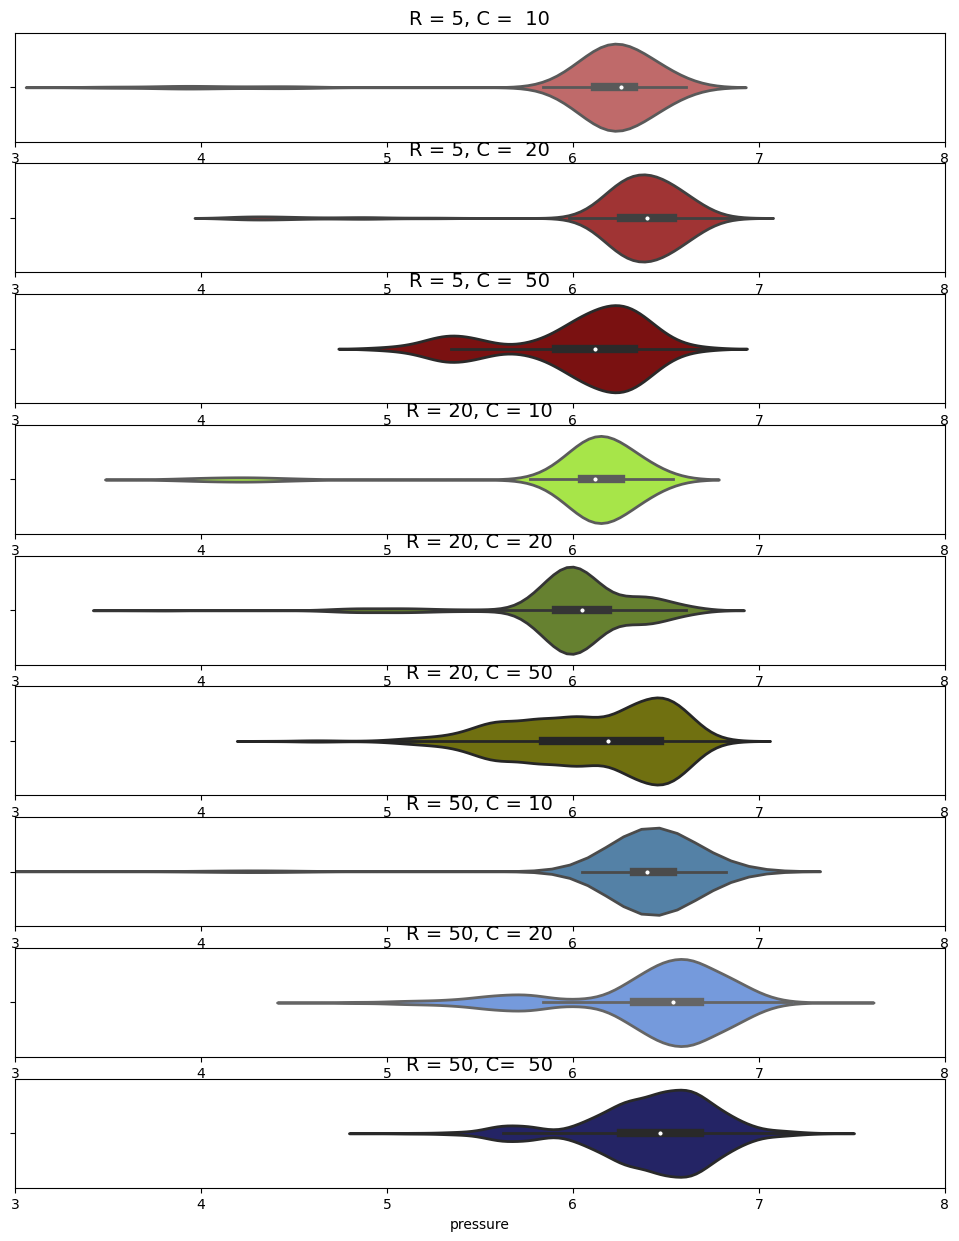

In [9]:
zero_time = Train_df.query("time_step < 0.00001 & u_in < 0.00001").reset_index(drop = True)
zero_time_5_10 = zero_time.query("R == 5 & C == 10").reset_index(drop = True)
zero_time_5_20 = zero_time.query("R == 5 & C == 20").reset_index(drop = True)
zero_time_5_50 = zero_time.query("R == 5 & C == 50").reset_index(drop = True)
zero_time_20_10 = zero_time.query("R == 20 & C == 10").reset_index(drop = True)
zero_time_20_20 = zero_time.query("R == 20 & C == 20").reset_index(drop = True)
zero_time_20_50 = zero_time.query("R == 20 & C == 50").reset_index(drop = True)
zero_time_50_10 = zero_time.query("R == 50 & C == 10").reset_index(drop = True)
zero_time_50_20 = zero_time.query("R == 50 & C == 20").reset_index(drop = True)
zero_time_50_50 = zero_time.query("R == 50 & C == 50").reset_index(drop = True)

fig, axes = plt.subplots(9, 1, figsize = (12, 15))
sns.violinplot(x = zero_time_5_10["pressure"], linewidth = 2, ax = axes[0], color = "indianred")
axes[0].set_title("R = 5, C =  10", fontsize = 14)
axes[0].set(xlim = (3, 8))

sns.violinplot(x = zero_time_5_20["pressure"], linewidth = 2, ax = axes[1], color = "firebrick")
axes[1].set_title("R = 5, C =  20", fontsize = 14)
axes[1].set(xlim = (3, 8))

sns.violinplot(x = zero_time_5_50["pressure"], linewidth = 2, ax = axes[2], color = "darkred")
axes[2].set_title("R = 5, C =  50", fontsize = 14)
axes[2].set(xlim = (3, 8))

sns.violinplot(x = zero_time_20_10["pressure"], linewidth = 2, ax = axes[3], color = "greenyellow")
axes[3].set_title("R = 20, C = 10", fontsize = 14)
axes[3].set(xlim = (3, 8))

sns.violinplot(x = zero_time_20_20["pressure"], linewidth = 2, ax = axes[4], color = "olivedrab")
axes[4].set_title("R = 20, C = 20", fontsize = 14)
axes[4].set(xlim = (3, 8))

sns.violinplot(x = zero_time_20_50["pressure"], linewidth = 2, ax = axes[5], color = "olive")
axes[5].set_title("R = 20, C = 50", fontsize = 14)
axes[5].set(xlim = (3, 8))

sns.violinplot(x = zero_time_50_10["pressure"], linewidth = 2, ax = axes[6], color = "steelblue")
axes[6].set_title("R = 50, C = 10", fontsize = 14)
axes[6].set(xlim = (3, 8))

sns.violinplot(x = zero_time_50_20["pressure"], linewidth = 2, ax = axes[7], color = "cornflowerblue")
axes[7].set_title("R = 50, C = 20", fontsize = 14)
axes[7].set(xlim = (3, 8))

sns.violinplot(x = zero_time_50_50["pressure"], linewidth = 2, ax = axes[8], color = "midnightblue")
axes[8].set_title("R = 50, C=  50", fontsize = 14)
axes[8].set(xlim = (3, 8))

zero_time 분석

In [10]:
submission = pd.read_csv("/kaggle/input/ventilator-pressure-prediction/train.csv")
submission = breath_one
submission.to_csv('final_submission.csv', index = False)